# Learning Steps Of Causal Model Discovery & Validation

## 1. Basic Example for Calculating the Causal Effect

In [57]:
import numpy as np
from dowhy import CausalModel
import dowhy.datasets

In [58]:
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_effect_modifiers=1,
    num_samples=5000,
    treatment_is_binary=True,
    stddev_treatment_noise=10,
    num_discrete_common_causes=1,
)
df = data["df"]

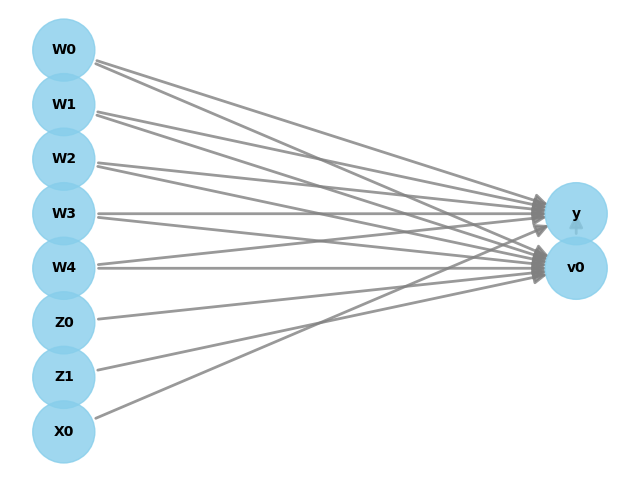

In [59]:
model = CausalModel(
    data=df,
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"],
)
model.view_model()

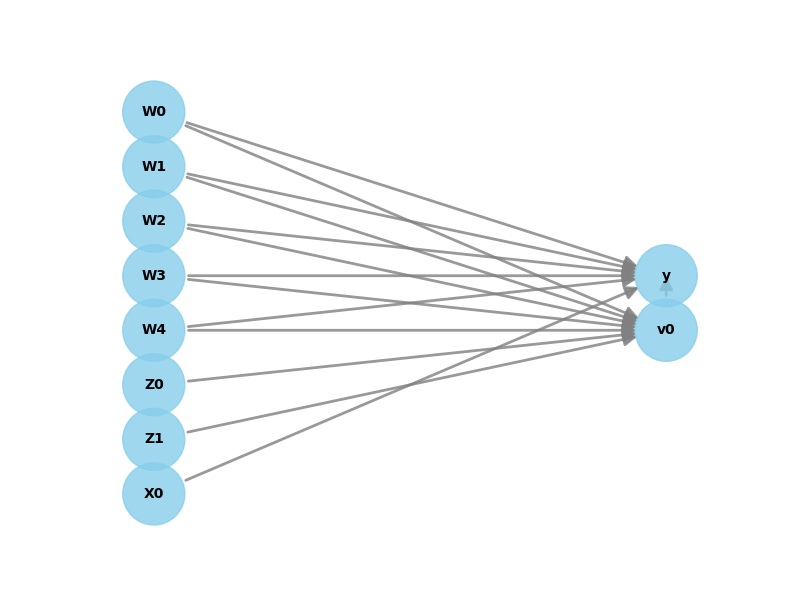

In [60]:
from IPython.display import Image, display

display(Image(filename="causal_model.png"))

## 2. Basic Example for Graphical Causal Models

In [61]:
from dowhy import gcm
import networkx as nx

causal_graph = nx.DiGraph([("X", "Y"), ("Y", "Z")])
causal_model = gcm.StructuralCausalModel(causal_graph)

In [62]:
import numpy as np, pandas as pd

X = np.random.normal(loc=0, scale=1, size=1000)
Y = 2 * X + np.random.normal(loc=0, scale=1, size=1000)
Z = 3 * Y + np.random.normal(loc=0, scale=1, size=1000)
data = pd.DataFrame(data=dict(X=X, Y=Y, Z=Z))
data.head()

,X,Y,Z
0,-0.012967,-0.171739,0.628325
1,-1.253688,-2.040957,-5.425381
2,0.307387,1.169914,3.582593
3,1.040894,3.073848,9.278894
4,0.416849,0.561516,0.865646


In [63]:
auto_assignment_summary = gcm.auto.assign_causal_mechanisms(causal_model, data)
print(auto_assignment_summary)

KeyboardInterrupt: 

In [ ]:
gcm.fit(causal_model, data)

Fitting causal mechanism of node Z: 100%|██████████| 3/3 [00:00<00:00, 298.51it/s]


Test permutations of given graph: 100%|██████████| 6/6 [00:01<00:00,  3.39it/s]


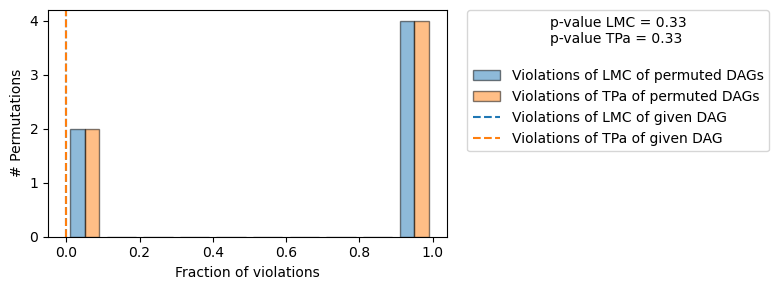

Evaluated the performance of the causal mechanisms and the invertibility assumption of the causal mechanisms and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Causal Mechanisms ====
The used evaluation metrics are:
- KL divergence (only for root-nodes): Evaluates the divergence between the generated and the observed distribution.
- Mean Squared Error (MSE): Evaluates the average squared differences between the observed values and the conditional expectation of the causal mechanisms.
- Normalized MSE (NMSE): The MSE normalized by the standard deviation for better comparison.
- R2 coefficient: Indicates how much variance is explained by the conditional expectations of the mechanisms. Note, however, that this can be misleading for nonlinear relationships.
- F1 score (only for categorical non-root nodes): The harmonic mean of the precision and recall indicating the goodness of the under

In [ ]:
print(gcm.evaluate_causal_model(causal_model, data))

In [ ]:
samples = gcm.interventional_samples(
    causal_model, {"Y": lambda y: 2.34}, num_samples_to_draw=1000
)
samples.head()

,X,Y,Z
0,0.125173,2.34,6.694769
1,0.121602,2.34,7.305622
2,0.301224,2.34,7.573998
3,-1.204591,2.34,6.364017
4,-0.137362,2.34,5.045656


## Autoassignment usage

In [ ]:
import numpy as np, pandas as pd
import networkx as nx
import dowhy.gcm as gcm

X = np.random.normal(loc=0, scale=1, size=1000)
Y = 2 * X + np.random.normal(loc=0, scale=1, size=1000)
Z = 3 * Y + np.random.normal(loc=0, scale=1, size=1000)
data = pd.DataFrame(data=dict(X=X, Y=Y, Z=Z))
causal_model = gcm.StructuralCausalModel(nx.DiGraph([("X", "Y"), ("Y", "Z")]))
summary_auto_assignment = gcm.auto.assign_causal_mechanisms(causal_model, data)
print(summary_auto_assignment)

When using this auto assignment function, the given data is used to automatically assign a causal mechanism to each node. Note that causal mechanisms can also be customized and assigned manually.
The following types of causal mechanisms are considered for the automatic selection:

If root node:
An empirical distribution, i.e., the distribution is represented by randomly sampling from the provided data. This provides a flexible and non-parametric way to model the marginal distribution and is valid for all types of data modalities.

If non-root node and the data is continuous:
Additive Noise Models (ANM) of the form X_i = f(PA_i) + N_i, where PA_i are the parents of X_i and the unobserved noise N_i is assumed to be independent of PA_i.To select the best model for f, different regression models are evaluated and the model with the smallest mean squared error is selected.Note that minimizing the mean squared error here is equivalent to selecting the best choice of an ANM.

If non-root node

In [8]:
gcm.fit(causal_model, data)

Fitting causal mechanism of node Z: 100%|██████████| 3/3 [00:00<00:00, 124.96it/s]


Test permutations of given graph: 100%|██████████| 6/6 [00:00<00:00, 20.24it/s]


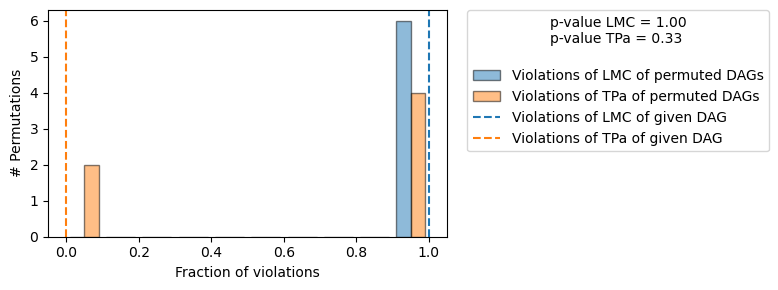

Evaluated the performance of the causal mechanisms and the invertibility assumption of the causal mechanisms and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Causal Mechanisms ====
The used evaluation metrics are:
- KL divergence (only for root-nodes): Evaluates the divergence between the generated and the observed distribution.
- Mean Squared Error (MSE): Evaluates the average squared differences between the observed values and the conditional expectation of the causal mechanisms.
- Normalized MSE (NMSE): The MSE normalized by the standard deviation for better comparison.
- R2 coefficient: Indicates how much variance is explained by the conditional expectations of the mechanisms. Note, however, that this can be misleading for nonlinear relationships.
- F1 score (only for categorical non-root nodes): The harmonic mean of the precision and recall indicating the goodness of the under

In [9]:
summary_evaluation = gcm.evaluate_causal_model(
    causal_model, data, compare_mechanism_baselines=True
)
print(summary_evaluation)

In [10]:
from scipy.stats import norm
import networkx as nx
from dowhy import gcm

causal_model = gcm.ProbabilisticCausalModel(nx.DiGraph([("X", "Y")]))
causal_model.set_causal_mechanism("X", gcm.ScipyDistribution(norm))

In [11]:
causal_model.set_causal_mechanism(
    "Y",
    gcm.AdditiveNoiseModel(
        prediction_model=gcm.ml.create_linear_regressor(),
        noise_model=gcm.ScipyDistribution(norm),
    ),
)

In [12]:
import numpy as np, pandas as pd

X = np.random.normal(loc=0, scale=1, size=1000)
Y = 2 * X + np.random.normal(loc=0, scale=1, size=1000)
data = pd.DataFrame(data=dict(X=X, Y=Y))

In [13]:
gcm.fit(causal_model, data)

Fitting causal mechanism of node Y: 100%|██████████| 2/2 [00:00<00:00, 798.08it/s]


In [14]:
from sklearn.ensemble import RandomForestRegressor

causal_model.set_causal_mechanism(
    "Y", gcm.AdditiveNoiseModel(gcm.ml.SklearnRegressionModel(RandomForestRegressor))
)

## Causal Discovery

In [1]:
import dowhy
from dowhy import CausalModel

import numpy as np
import pandas as pd
import graphviz
import networkx as nx

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)


def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.01
    dirs = np.where(idx)
    d = graphviz.Digraph(engine="dot")
    names = labels if labels else [f"x{i}" for i in range(len(adjacency_matrix))]
    for name in names:
        d.node(name)
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=str(coef))
    return d


def str_to_dot(string):
    """
    Converts input string from graphviz library to valid DOT graph format.
    """
    graph = string.strip().replace("\n", ";").replace("\t", "")
    graph = (
        graph[:9] + graph[10:-2] + graph[-1]
    )  # Removing unnecessary characters from string
    return graph

/opt/anaconda3/envs/causalAnalysis/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_df = pd.read_csv(
    "/Users/lujun.li/projects/causallm-github/causalllm/resource/output/MT/exp_result_Meta-Llama-3-8B-Instruct_sp_bleu.csv"
)

In [3]:
data_df.columns

Index(['Unnamed: 0', 'Temperature', 'id', 'sentence_target', 'sentence_eng',
       'dataset_name', 'initial_prompt', 'llama2_chat_initial_prompt',
       'llama3_chat_initial_prompt', 'mixtral_instruct_initial_prompt',
       'SYSTEM_MESSAGE', 'USER_MESSAGE', 'generated_response', 'timestamp',
       'elapsed_time', 'temperature', 'model', 'generated_response_pure',
       'spbleu'],
      dtype='object')

In [4]:
data_df.dropna(inplace=True)
# data_df = data_df[["Temperature", "model", "elapsed_time", "spbleu", "dataset_name"]]
data_df = data_df[["Temperature", "elapsed_time", "spbleu"]]
print(data_df.shape)
data_df.head()

(2100, 3)


,Temperature,elapsed_time,spbleu
0,0.1,12.326098,18.058731
1,0.1,4.851995,30.389781
2,0.1,4.128073,15.880640
3,0.1,6.979652,35.267504
4,0.1,4.830333,14.857277


Depth=1, working on node 2: 100%|██████████| 3/3 [00:00<00:00, 1030.96it/s]
/opt/anaconda3/envs/causalAnalysis/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/opt/anaconda3/envs/causalAnalysis/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


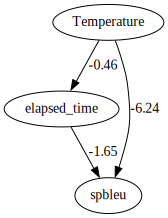

In [15]:
from causallearn.search.ConstraintBased.PC import pc

labels = [f"{col}" for i, col in enumerate(data_df.columns)]
data = data_df.to_numpy()

cg = pc(data)

# # Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

# pyd = GraphUtils.to_pydot(cg.G, labels=labels)
# tmp_png = pyd.create_png(f="png")
# fp = io.BytesIO(tmp_png)
# img = mpimg.imread(fp, format="png")
# plt.axis("off")
# plt.imshow(img)
# plt.show()

# from causallearn.search.ScoreBased.GES import ges

# # default parameters
# Record = ges(data)

# # Visualization using pydot
# from causallearn.utils.GraphUtils import GraphUtils
# import matplotlib.image as mpimg
# import matplotlib.pyplot as plt
# import io

# pyd = GraphUtils.to_pydot(Record['G'], labels=labels)
# tmp_png = pyd.create_png(f="png")
# fp = io.BytesIO(tmp_png)
# img = mpimg.imread(fp, format='png')
# plt.axis('off')
# plt.imshow(img)
# plt.show()

# Use LiNGAM

from causallearn.search.FCMBased import lingam

model_lingam = lingam.ICALiNGAM()
model_lingam.fit(data)

from causallearn.search.FCMBased.lingam.utils import make_dot

make_dot(model_lingam.adjacency_matrix_, labels=labels)

In [16]:
# Obtain valid dot format
graph_dot = make_graph(model_lingam.adjacency_matrix_, labels=labels)

# Define Causal Model
model = CausalModel(
    data=data_df,
    treatment="Temperature",
    outcome="spbleu",
    graph=str_to_dot(graph_dot.source),
)

# Identification
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

# Estimation
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    control_value=0,
    treatment_value=1,
    confidence_intervals=True,
    test_significance=True,
)
print("Causal Estimate is " + str(estimate.value))

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                  
──────────────(E[spbleu])
d[Temperature]           
Estimand assumption 1, Unconfoundedness: If U→{Temperature} and U→spbleu then P(spbleu|Temperature,,U) = P(spbleu|Temperature,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Causal Estimate is -5.470102762405478


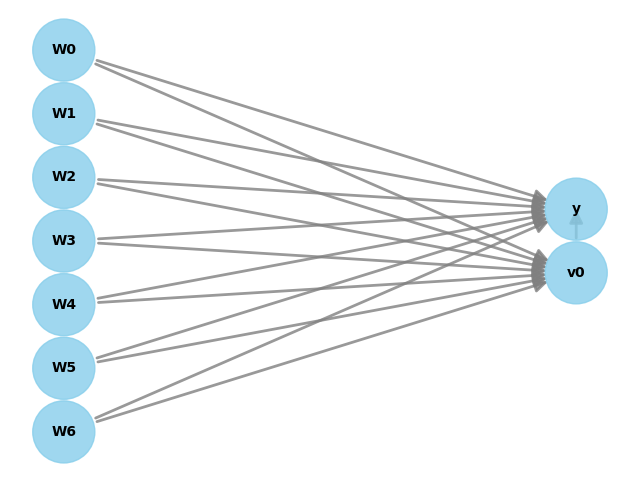

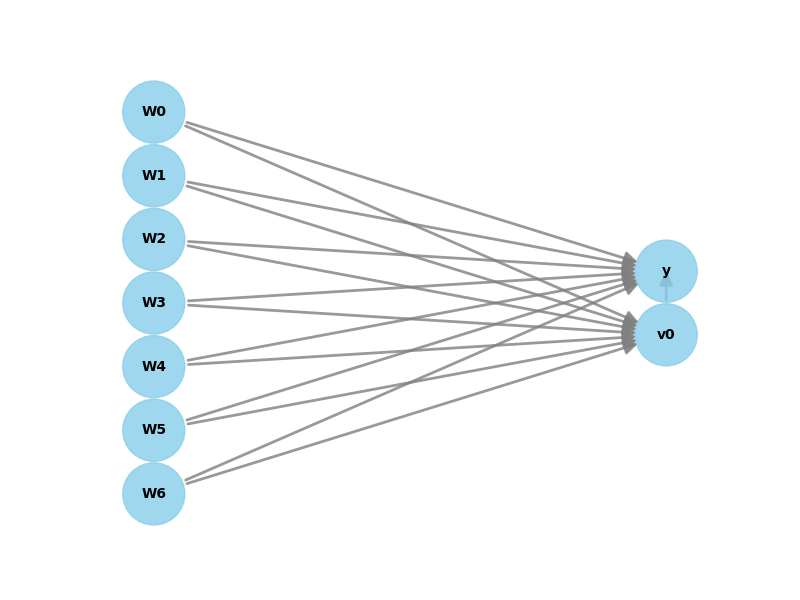

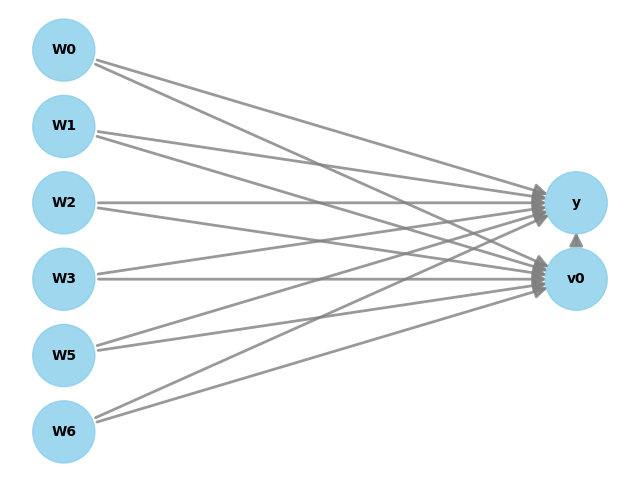

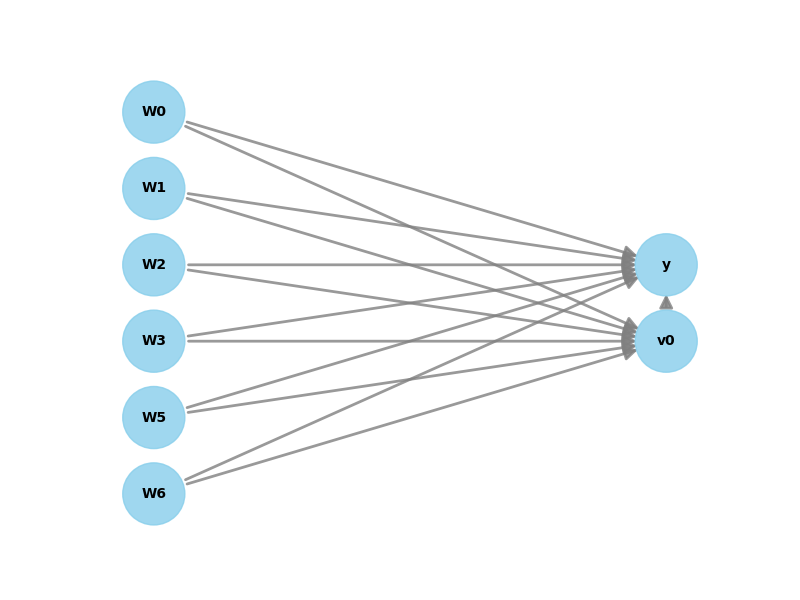

,W0,W1,W2,W3,W5,W6,v0,y
0,-0.145062,-0.235286,0.784843,0.869131,-1.290234,0.116096,True,1.386517
1,-0.228109,-0.020264,-0.589792,0.188139,-1.764439,-0.167236,False,-16.159402
2,0.868298,-1.097642,-0.109792,0.487635,-0.527930,-0.066542,False,-0.702560
3,-0.017115,1.123918,0.346060,1.845425,0.778865,0.596496,True,27.714465
4,-0.757347,-1.426205,-0.457063,1.528053,0.394312,-0.687839,False,-20.082633


In [38]:
import os, sys

sys.path.append(os.path.abspath("../../../"))
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np
import dowhy.datasets

# Config dict to set the logging level
import logging.config

DEFAULT_LOGGING = {
    "version": 1,
    "disable_existing_loggers": False,
    "loggers": {
        "": {
            "level": "ERROR",
        },
    },
}

logging.config.dictConfig(DEFAULT_LOGGING)
# Disabling warnings output
import warnings
from sklearn.exceptions import DataConversionWarning

# warnings.filterwarnings(action='ignore', category=DataConversionWarning)

np.random.seed(100)
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=7,
    num_samples=500,
    num_treatments=1,
    stddev_treatment_noise=10,
    stddev_outcome_noise=5,
)

model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"],
    test_significance=None,
)
model.view_model()
from IPython.display import Image, display

display(Image(filename="causal_model.png"))
data["df"].head()

data["df"] = data["df"].drop("W4", axis=1)
graph_str = 'graph[directed 1node[ id "y" label "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"]  node[ id "W5" label "W5"] node[ id "W6" label "W6"]node[ id "v0" label "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"] edge[ source "W2" target "v0"] edge[ source "W3" target "v0"] edge[ source "W5" target "v0"] edge[ source "W6" target "v0"]edge[ source "W0" target "y"] edge[ source "W1" target "y"] edge[ source "W2" target "y"] edge[ source "W3" target "y"] edge[ source "W5" target "y"] edge[ source "W6" target "y"]]'
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=graph_str,
    test_significance=None,
)
model.view_model()
from IPython.display import Image, display

display(Image(filename="causal_model.png"))
data["df"].head()

In [39]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                          
─────(E[y|W1,W5,W0,W3,W6,W2])
d[v₀]                        
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W5,W0,W3,W6,W2,U) = P(y|v0,W1,W5,W0,W3,W6,W2)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [44]:
estimate.estimator

In [47]:
!pip list

Package              Version
-------------------- -----------
appnope              0.1.4
asttokens            2.4.1
Brotli               1.0.9
build                1.2.1
CacheControl         0.14.0
causal-learn         0.1.3.8
certifi              2024.2.2
cffi                 1.16.0
charset-normalizer   3.3.2
cleo                 2.1.0
cmake                3.29.3
colorama             0.4.6
comm                 0.2.2
contourpy            1.0.7
crashtest            0.4.1
cvxpy                1.3.1
cycler               0.12.1
Cython               0.29.34
debugpy              1.6.7
decorator            5.1.1
distlib              0.3.8
dowhy                0.11.1
dulwich              0.21.7
ecos                 2.0.13
exceptiongroup       1.2.0
executing            2.0.1
fastjsonschema       2.19.1
filelock             3.14.0
fonttools            4.51.0
gmpy2                2.1.2
graphviz             0.20.3
idna                 3.7
importlib_metadata   7.1.0
importlib_resources  6.4.0
inst

/opt/anaconda3/envs/causalAnalysis/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


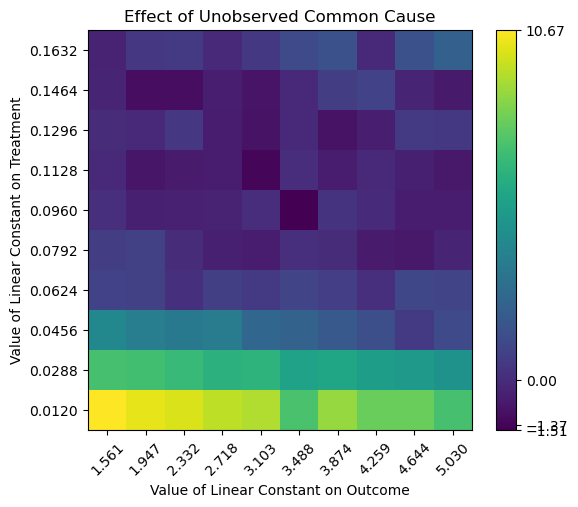

In [46]:
refute = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
)

In [53]:
! conda install econml -y

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/causalAnalysis

  added / updated specs:
    - econml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.2.2           |   py39hca03da5_0         160 KB
    cloudpickle-2.2.1          |   py39hca03da5_0          43 KB
    dowhy-0.7.1                |     pyhd8ed1ab_0         109 KB  conda-forge
    econml-0.15.0              |   py39h47e51b9_0         997 KB  conda-forge
    libcxx-17.0.6              |       h5f092b4_0         1.2 MB  conda-forge
    lightgbm-4.3.0             |   py39h313beb8_0         1.3 MB
    llvmlite-0.42.0            |   py39h313beb8_0         320 KB
    numba-0.59.1               |   py39h313beb8_0         4.4 MB
    shap-0.42.1                |   py39h46d7db6_0         573 KB
    slicer-0.0.7            

/opt/anaconda3/envs/causalAnalysis/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


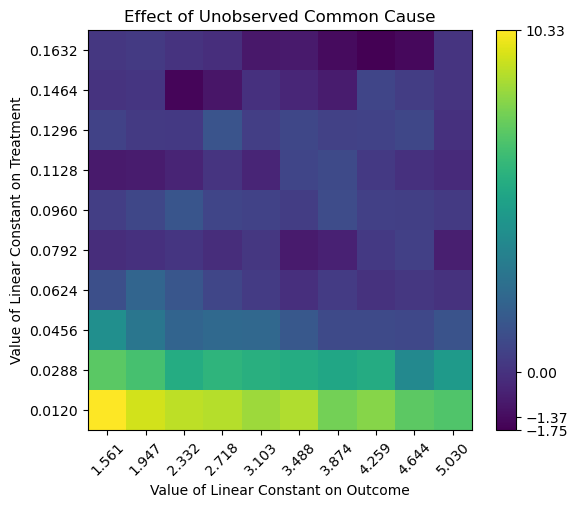

Refute: Add an Unobserved Common Cause
Estimated effect:-5.470102762405478
New effect:(-1.7467928572942504, 10.33205711535349)



In [56]:
refute = model.refute_estimate(
    identified_estimand,
    estimate=estimate,
    method_name="add_unobserved_common_cause",
    partial_r2_confounder_treatment=np.arange(0, 0.8, 0.1),
    partial_r2_confounder_outcome=np.arange(0, 0.8, 0.1),
)
print(refute)